In [1]:
# Bibliotecas básicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Configurações
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("✅ Bibliotecas importadas com sucesso!")

✅ Bibliotecas importadas com sucesso!


In [2]:
# Carregar dados
df = pd.read_csv(r'C:\Users\alexandre.souza\Downloads\archive\datasetinjury.csv')

# Ver primeiras linhas
print("📊 Primeiras linhas do dataset:")
print(df.head())

print("\n" + "="*50)
print(f"📈 Total de registros: {len(df)}")
print(f"📋 Total de colunas: {len(df.columns)}")
print(f"📝 Colunas disponíveis: {list(df.columns)}")

📊 Primeiras linhas do dataset:
  Season                     Injury     Days  Games missed injury_from_parsed  \
0  20/21  Syndesmosis ligament tear  43 days             9          1/28/2021   
1  20/21                Knee injury  37 days             6           3/7/2021   
2  20/21               Corona virus  21 days             4          2/17/2021   
3  20/21                     bruise   8 days             2          11/6/2020   
4  20/21            Ligament injury  22 days             2          7/26/2020   

  injury_until_parsed           player_name  player_age player_position  \
0           3/11/2021       Alexander Nübel          24      Goalkeeper   
1           4/12/2021  Ron-Thorben Hoffmann          22      Goalkeeper   
2            3/9/2021       Benjamin Pavard          25     Centre-Back   
3          11/13/2020       Benjamin Pavard          25     Centre-Back   
4           8/16/2020       Benjamin Pavard          25     Centre-Back   

            club      league  


In [3]:
# Informações gerais
print("INFORMACOES DO DATASET:")
print(df.info())

print("\n" + "="*50)
print("ESTATISTICAS DESCRITIVAS (player_age e Days):")
print(df[['player_age', 'Days']].describe())

print("\n" + "="*50)
print("VALORES MISSING POR COLUNA:")
missing = df.isnull().sum()
print(missing[missing > 0])

print("\n" + "="*50)
print("POSICOES UNICAS:")
print(df['player_position'].value_counts())

print("\n" + "="*50)
print("LIGAS UNICAS:")
print(df['league'].value_counts())

INFORMACOES DO DATASET:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15603 entries, 0 to 15602
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Season               15603 non-null  object
 1   Injury               15603 non-null  object
 2   Days                 15603 non-null  object
 3   Games missed         15603 non-null  int64 
 4   injury_from_parsed   15603 non-null  object
 5   injury_until_parsed  15603 non-null  object
 6   player_name          15603 non-null  object
 7   player_age           15603 non-null  int64 
 8   player_position      15603 non-null  object
 9   club                 15603 non-null  object
 10  league               15603 non-null  object
dtypes: int64(2), object(9)
memory usage: 1.3+ MB
None

ESTATISTICAS DESCRITIVAS (player_age e Days):
         player_age
count  15603.000000
mean      26.550663
std        4.398164
min       16.000000
25%       23.000000
50%     

In [4]:
# Converter coluna Days de texto para numero
# Remove " days" do final e converte para int
df['Days_clean'] = df['Days'].str.replace(' days', '').astype(int)

# Criar categorias de idade
def categorize_age(age):
    if age < 23:
        return 'Young (16-22)'
    elif age < 28:
        return 'Prime (23-27)'
    elif age < 32:
        return 'Experienced (28-31)'
    else:
        return 'Veteran (32+)'

df['age_category'] = df['player_age'].apply(categorize_age)

# Converter datas para datetime
df['injury_from_parsed'] = pd.to_datetime(df['injury_from_parsed'])
df['injury_until_parsed'] = pd.to_datetime(df['injury_until_parsed'])

print("LIMPEZA CONCLUIDA!")
print("\nPrimeiras linhas com novos campos:")
print(df[['player_name', 'player_age', 'age_category', 'Days', 'Days_clean']].head())

print("\n" + "="*50)
print("ESTATISTICAS DA COLUNA Days_clean:")
print(df['Days_clean'].describe())

LIMPEZA CONCLUIDA!

Primeiras linhas com novos campos:
            player_name  player_age   age_category     Days  Days_clean
0       Alexander Nübel          24  Prime (23-27)  43 days          43
1  Ron-Thorben Hoffmann          22  Young (16-22)  37 days          37
2       Benjamin Pavard          25  Prime (23-27)  21 days          21
3       Benjamin Pavard          25  Prime (23-27)   8 days           8
4       Benjamin Pavard          25  Prime (23-27)  22 days          22

ESTATISTICAS DA COLUNA Days_clean:
count    15603.000000
mean        36.102929
std         54.419842
min          1.000000
25%          9.000000
50%         18.000000
75%         39.000000
max       1013.000000
Name: Days_clean, dtype: float64


In [5]:
# Analise basica por categoria de idade
print("DIAS AFASTADO POR CATEGORIA DE IDADE:")
age_analysis = df.groupby('age_category')['Days_clean'].agg(['mean', 'median', 'count'])
print(age_analysis.sort_values('mean', ascending=False))

print("\n" + "="*50)
print("DIAS AFASTADO POR POSICAO (Top 10):")
position_analysis = df.groupby('player_position')['Days_clean'].agg(['mean', 'median', 'count'])
print(position_analysis.sort_values('mean', ascending=False).head(10))

print("\n" + "="*50)
print("TIPOS DE LESAO MAIS COMUNS (Top 15):")
injury_counts = df['Injury'].value_counts().head(15)
print(injury_counts)

print("\n" + "="*50)
print("LESOES MAIS GRAVES (maior tempo medio de recuperacao):")
injury_severity = df.groupby('Injury')['Days_clean'].agg(['mean', 'count'])
injury_severity = injury_severity[injury_severity['count'] >= 10]  # Minimo 10 casos
print(injury_severity.sort_values('mean', ascending=False).head(10))

DIAS AFASTADO POR CATEGORIA DE IDADE:
                          mean  median  count
age_category                                 
Young (16-22)        41.948792    21.0   3105
Prime (23-27)        36.358588    18.0   6177
Veteran (32+)        33.139756    17.0   2211
Experienced (28-31)  32.896350    18.0   4110

DIAS AFASTADO POR POSICAO (Top 10):
                         mean  median  count
player_position                             
Goalkeeper          39.187291    18.0    897
Right Midfield      37.979381    21.0     97
Centre-Back         37.759478    19.0   3139
Left-Back           37.730924    19.0   1245
Forward             37.024933    18.0   2246
Left Winger         36.502161    20.0   1157
Right-Back          36.084957    20.0   1283
Central Midfield    34.668244    18.0   1902
Defensive Midfield  33.931234    18.0   1207
Right Winger        33.922619    18.0   1008

TIPOS DE LESAO MAIS COMUNS (Top 15):
Injury
Hamstring injury     1256
Corona virus          986
Muscle injur

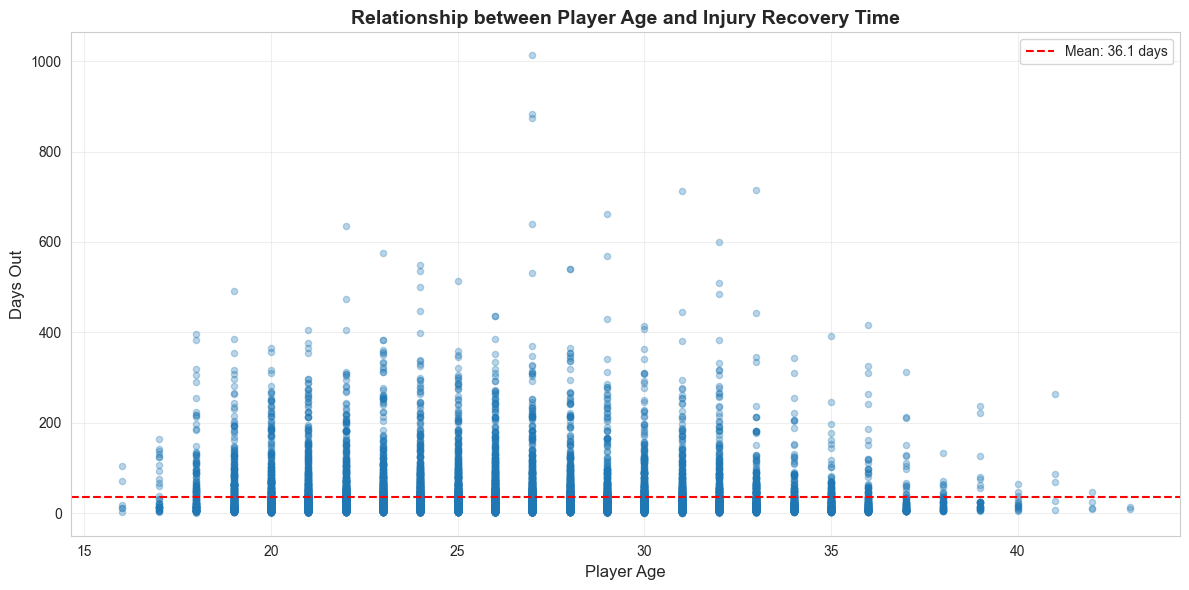

Grafico 1 salvo como: age_vs_days.png


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Grafico 1: Scatter plot - Idade vs Dias Afastado
plt.figure(figsize=(12, 6))
plt.scatter(df['player_age'], df['Days_clean'], alpha=0.3, s=20)
plt.xlabel('Player Age', fontsize=12)
plt.ylabel('Days Out', fontsize=12)
plt.title('Relationship between Player Age and Injury Recovery Time', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.axhline(y=df['Days_clean'].mean(), color='r', linestyle='--', label=f'Mean: {df["Days_clean"].mean():.1f} days')
plt.legend()
plt.tight_layout()
plt.savefig('age_vs_days.png', dpi=300, bbox_inches='tight')
plt.show()

print("Grafico 1 salvo como: age_vs_days.png")

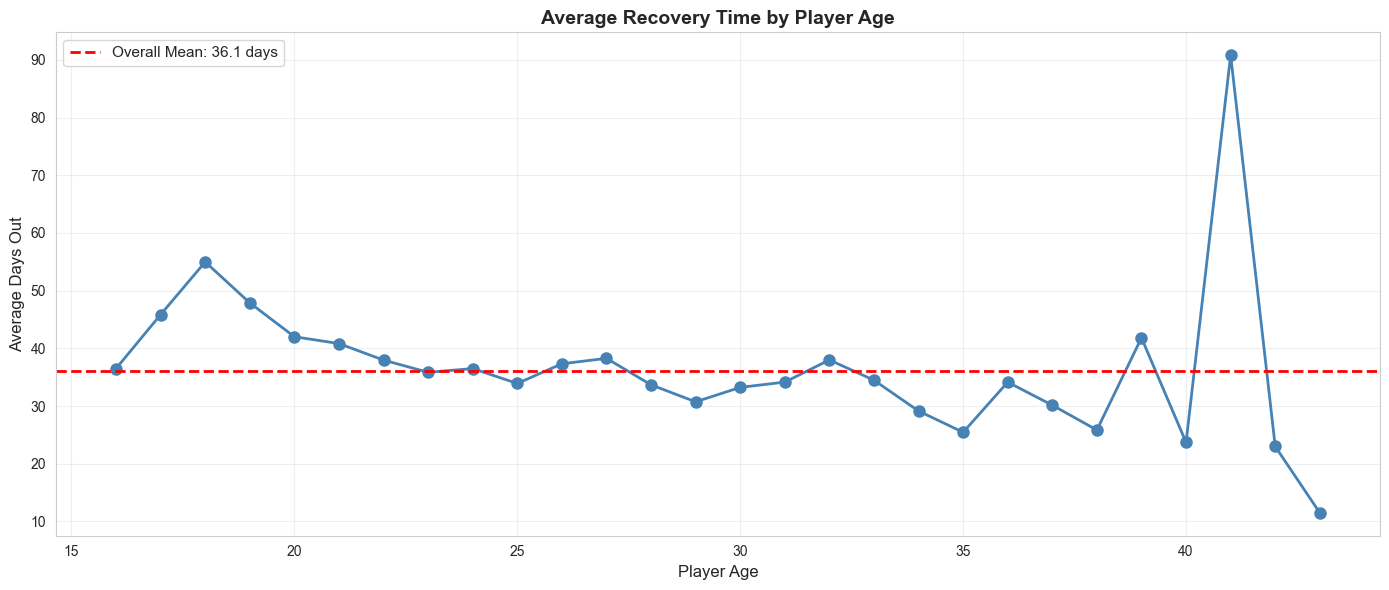

Grafico salvo como: avg_days_by_age.png

Medias por idade:
    player_age  Days_clean
0           16   36.500000
1           17   45.857143
2           18   54.976879
3           19   47.882494
4           20   42.019667
5           21   40.829865
6           22   37.967871
7           23   35.852968
8           24   36.500000
9           25   33.919019
10          26   37.330489
11          27   38.272367
12          28   33.682669
13          29   30.738404
14          30   33.241968
15          31   34.154895
16          32   37.996988
17          33   34.484127
18          34   29.148571
19          35   25.458065
20          36   34.152174
21          37   30.153061
22          38   25.851064
23          39   41.827586
24          40   23.714286
25          41   90.800000
26          42   23.000000
27          43   11.500000


In [7]:
# Calcular media de dias afastado por idade
age_mean = df.groupby('player_age')['Days_clean'].mean().reset_index()

# Grafico: Media de tempo afastado por idade
plt.figure(figsize=(14, 6))
plt.plot(age_mean['player_age'], age_mean['Days_clean'], marker='o', linewidth=2, markersize=8, color='steelblue')
plt.xlabel('Player Age', fontsize=12)
plt.ylabel('Average Days Out', fontsize=12)
plt.title('Average Recovery Time by Player Age', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.axhline(y=df['Days_clean'].mean(), color='red', linestyle='--', linewidth=2, label=f'Overall Mean: {df["Days_clean"].mean():.1f} days')
plt.legend(fontsize=11)
plt.tight_layout()
plt.savefig('avg_days_by_age.png', dpi=300, bbox_inches='tight')
plt.show()

print("Grafico salvo como: avg_days_by_age.png")
print("\nMedias por idade:")
print(age_mean)

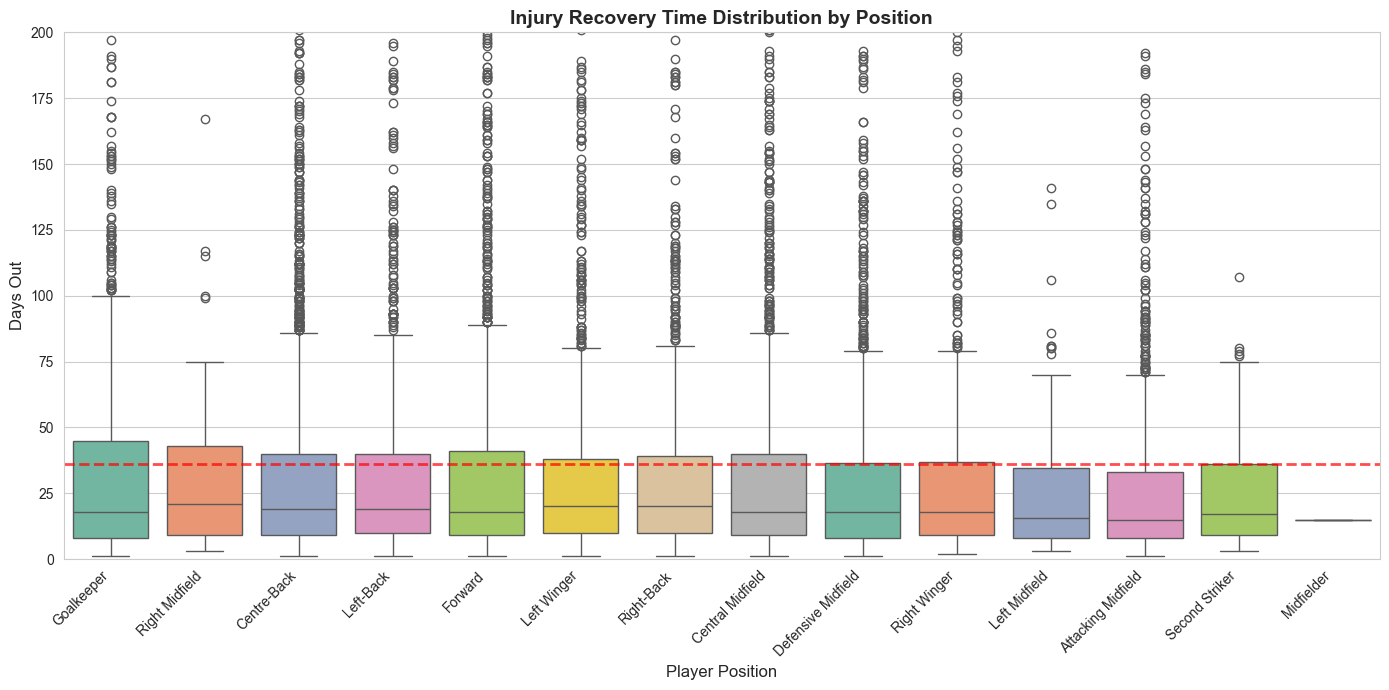

Grafico salvo como: recovery_by_position.png


In [8]:
# Calcular media por posicao
position_mean = df.groupby('player_position')['Days_clean'].agg(['mean', 'count']).reset_index()
position_mean = position_mean.sort_values('mean', ascending=False)

# Grafico: Boxplot por posicao
plt.figure(figsize=(14, 7))
df_sorted = df.copy()
df_sorted['player_position'] = pd.Categorical(df_sorted['player_position'], 
                                               categories=position_mean['player_position'], 
                                               ordered=True)

sns.boxplot(data=df_sorted, x='player_position', y='Days_clean', palette='Set2')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Player Position', fontsize=12)
plt.ylabel('Days Out', fontsize=12)
plt.title('Injury Recovery Time Distribution by Position', fontsize=14, fontweight='bold')
plt.axhline(y=df['Days_clean'].mean(), color='red', linestyle='--', linewidth=2, alpha=0.7)
plt.ylim(0, 200)  # Limitar eixo Y para melhor visualizacao
plt.tight_layout()
plt.savefig('recovery_by_position.png', dpi=300, bbox_inches='tight')
plt.show()

print("Grafico salvo como: recovery_by_position.png")

NOVA DISTRIBUICAO POR CATEGORIA:
age_category
Experienced (28-31)    4110
Prime (23-27)          6177
Senior (35+)            693
Veteran (32-34)        1518
Young (16-22)          3105
Name: count, dtype: int64

MEDIA DE DIAS POR NOVA CATEGORIA:
                          mean  median  count
age_category                                 
Experienced (28-31)  32.896350    18.0   4110
Prime (23-27)        36.358588    18.0   6177
Senior (35+)         29.523810    15.0    693
Veteran (32-34)      34.790514    17.0   1518
Young (16-22)        41.948792    21.0   3105


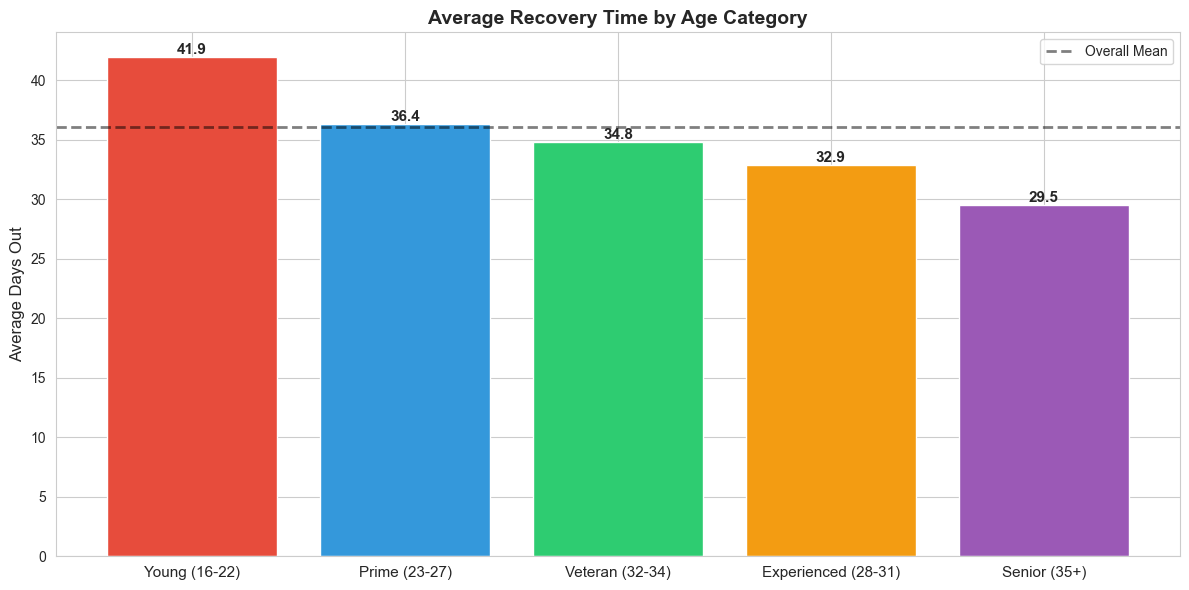


Grafico salvo como: recovery_by_age_category_v2.png


In [10]:
# Recriar categorias de idade com 35+
def categorize_age_new(age):
    if age < 23:
        return 'Young (16-22)'
    elif age < 28:
        return 'Prime (23-27)'
    elif age < 32:
        return 'Experienced (28-31)'
    elif age < 35:
        return 'Veteran (32-34)'
    else:
        return 'Senior (35+)'

df['age_category'] = df['player_age'].apply(categorize_age_new)

# Ver distribuicao
print("NOVA DISTRIBUICAO POR CATEGORIA:")
print(df['age_category'].value_counts().sort_index())

print("\n" + "="*50)
print("MEDIA DE DIAS POR NOVA CATEGORIA:")
age_cat_analysis = df.groupby('age_category')['Days_clean'].agg(['mean', 'median', 'count'])
print(age_cat_analysis)

# Refazer o grafico
age_cat_mean = df.groupby('age_category')['Days_clean'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
bars = plt.bar(range(len(age_cat_mean)), age_cat_mean.values, 
               color=['#e74c3c', '#3498db', '#2ecc71', '#f39c12', '#9b59b6'])
plt.xticks(range(len(age_cat_mean)), age_cat_mean.index, fontsize=11)
plt.ylabel('Average Days Out', fontsize=12)
plt.title('Average Recovery Time by Age Category', fontsize=14, fontweight='bold')
plt.axhline(y=df['Days_clean'].mean(), color='black', linestyle='--', linewidth=2, alpha=0.5, label='Overall Mean')

for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}',
             ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.legend()
plt.tight_layout()
plt.savefig('recovery_by_age_category_v2.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nGrafico salvo como: recovery_by_age_category_v2.png")

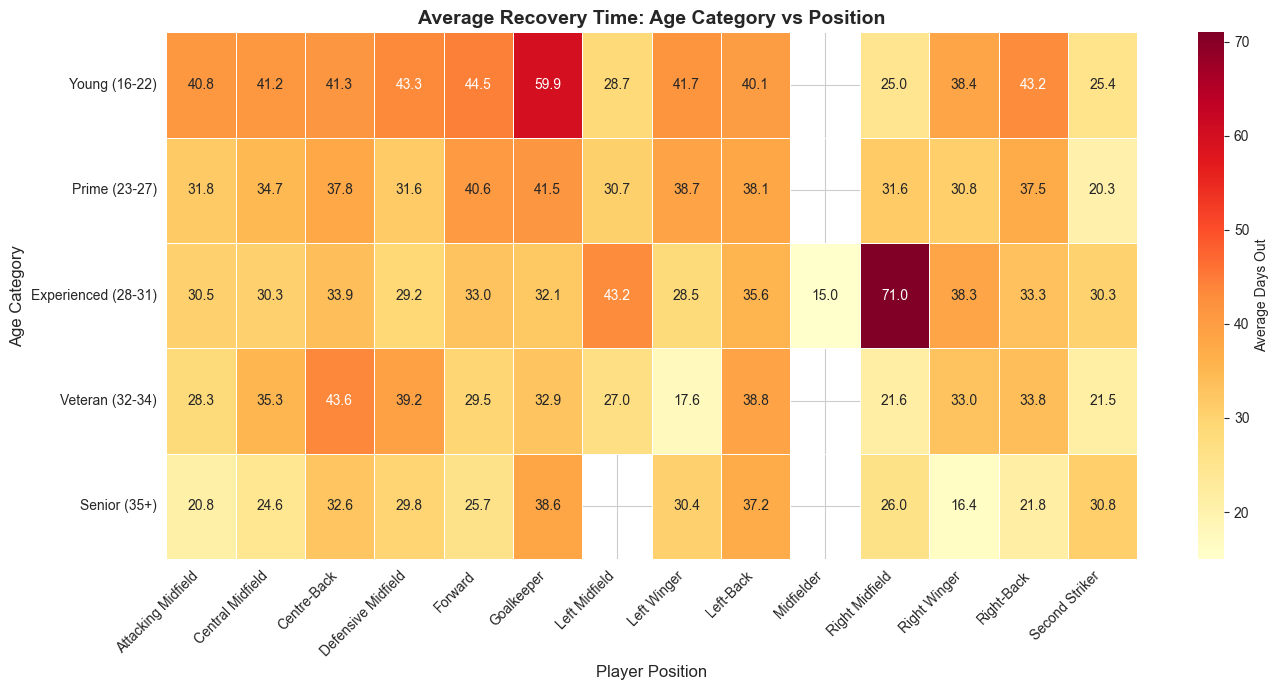

Grafico salvo como: heatmap_age_position.png

TOP 5 COMBINACOES COM MAIOR TEMPO DE RECUPERACAO:
           age_category     player_position       mean  count
10  Experienced (28-31)      Right Midfield  71.000000     25
57        Young (16-22)          Goalkeeper  59.921739    115
56        Young (16-22)             Forward  44.488778    401
41      Veteran (32-34)         Centre-Back  43.622291    323
55        Young (16-22)  Defensive Midfield  43.328829    222
63        Young (16-22)          Right-Back  43.189744    195
6   Experienced (28-31)       Left Midfield  43.187500     32
59        Young (16-22)         Left Winger  41.652695    334
19        Prime (23-27)          Goalkeeper  41.455357    224
54        Young (16-22)         Centre-Back  41.311475    549


In [11]:
# Calcular media de dias por idade e posicao
age_position_pivot = df.groupby(['age_category', 'player_position'])['Days_clean'].mean().unstack()

# Ordenar categorias de idade
age_order = ['Young (16-22)', 'Prime (23-27)', 'Experienced (28-31)', 'Veteran (32-34)', 'Senior (35+)']
age_position_pivot = age_position_pivot.reindex(age_order)

# Criar heatmap
plt.figure(figsize=(14, 7))
sns.heatmap(age_position_pivot, annot=True, fmt='.1f', cmap='YlOrRd', 
            cbar_kws={'label': 'Average Days Out'}, linewidths=0.5)
plt.xlabel('Player Position', fontsize=12)
plt.ylabel('Age Category', fontsize=12)
plt.title('Average Recovery Time: Age Category vs Position', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('heatmap_age_position.png', dpi=300, bbox_inches='tight')
plt.show()

print("Grafico salvo como: heatmap_age_position.png")

print("\n" + "="*50)
print("TOP 5 COMBINACOES COM MAIOR TEMPO DE RECUPERACAO:")
age_pos_analysis = df.groupby(['age_category', 'player_position'])['Days_clean'].agg(['mean', 'count']).reset_index()
age_pos_analysis = age_pos_analysis[age_pos_analysis['count'] >= 20]  # Minimo 20 casos
print(age_pos_analysis.sort_values('mean', ascending=False).head(10))

In [12]:
# Remover outliers extremos (lesoes acima de 365 dias)
df_model = df[df['Days_clean'] <= 365].copy()

print(f"Dados originais: {len(df)} registros")
print(f"Dados para modelo: {len(df_model)} registros")
print(f"Registros removidos: {len(df) - len(df_model)}")

print("\n" + "="*50)
print("ESTATISTICAS APOS REMOCAO DE OUTLIERS:")
print(df_model['Days_clean'].describe())

# Selecionar apenas posicoes principais (minimo 500 casos)
position_counts = df_model['player_position'].value_counts()
main_positions = position_counts[position_counts >= 500].index.tolist()

df_model = df_model[df_model['player_position'].isin(main_positions)].copy()

print("\n" + "="*50)
print(f"Posicoes mantidas ({len(main_positions)}):")
print(main_positions)
print(f"\nTotal de registros finais: {len(df_model)}")

Dados originais: 15603 registros
Dados para modelo: 15556 registros
Registros removidos: 47

ESTATISTICAS APOS REMOCAO DE OUTLIERS:
count    15556.000000
mean        34.695809
std         47.426595
min          1.000000
25%          9.000000
50%         18.000000
75%         38.000000
max        365.000000
Name: Days_clean, dtype: float64

Posicoes mantidas (10):
['Centre-Back', 'Forward', 'Central Midfield', 'Right-Back', 'Left-Back', 'Defensive Midfield', 'Left Winger', 'Attacking Midfield', 'Right Winger', 'Goalkeeper']

Total de registros finais: 15189


In [14]:
# Criar variaveis dummy para posicao
position_dummies = pd.get_dummies(df_model['player_position'], prefix='pos', drop_first=True)

# Criar variaveis dummy para liga
league_dummies = pd.get_dummies(df_model['league'], prefix='league', drop_first=True)

# Juntar tudo (idade como numerica, SEM categoria de idade)
df_model_final = pd.concat([
    df_model[['Days_clean', 'player_age']],
    position_dummies,
    league_dummies
], axis=1)

print("VARIAVEIS NO MODELO:")
print(df_model_final.columns.tolist())

print("\n" + "="*50)
print("SHAPE DO DATASET FINAL:")
print(f"Linhas: {df_model_final.shape[0]}")
print(f"Colunas: {df_model_final.shape[1]}")

print("\n" + "="*50)
print("PRIMEIRAS LINHAS:")
print(df_model_final.head())

VARIAVEIS NO MODELO:
['Days_clean', 'player_age', 'pos_Central Midfield', 'pos_Centre-Back', 'pos_Defensive Midfield', 'pos_Forward', 'pos_Goalkeeper', 'pos_Left Winger', 'pos_Left-Back', 'pos_Right Winger', 'pos_Right-Back', 'league_La Liga', 'league_Ligue 1', 'league_Premier League', 'league_Serie A']

SHAPE DO DATASET FINAL:
Linhas: 15189
Colunas: 15

PRIMEIRAS LINHAS:
   Days_clean  player_age  pos_Central Midfield  pos_Centre-Back  \
0          43          24                 False            False   
1          37          22                 False            False   
2          21          25                 False             True   
3           8          25                 False             True   
4          22          25                 False             True   

   pos_Defensive Midfield  pos_Forward  pos_Goalkeeper  pos_Left Winger  \
0                   False        False            True            False   
1                   False        False            True            

In [16]:
import statsmodels.api as sm

# Converter booleanos para inteiros
df_model_final_numeric = df_model_final.copy()
for col in df_model_final_numeric.columns:
    if df_model_final_numeric[col].dtype == 'bool':
        df_model_final_numeric[col] = df_model_final_numeric[col].astype(int)

# Preparar X e y
X = df_model_final_numeric.drop('Days_clean', axis=1)
y = df_model_final_numeric['Days_clean']

# Adicionar constante
X = sm.add_constant(X)

print("TREINANDO MODELO GLM (Distribuicao Gamma)...")
print("Isso pode levar alguns segundos...\n")

# Treinar modelo
glm_gamma = sm.GLM(y, X, family=sm.families.Gamma(link=sm.families.links.Log()))
result_gamma = glm_gamma.fit()

print("="*50)
print("MODELO TREINADO COM SUCESSO!")
print("="*50)
print("\nRESUMO DO MODELO:")
print(result_gamma.summary())

TREINANDO MODELO GLM (Distribuicao Gamma)...
Isso pode levar alguns segundos...

MODELO TREINADO COM SUCESSO!

RESUMO DO MODELO:
                 Generalized Linear Model Regression Results                  
Dep. Variable:             Days_clean   No. Observations:                15189
Model:                            GLM   Df Residuals:                    15174
Model Family:                   Gamma   Df Model:                           14
Link Function:                    Log   Scale:                          1.8577
Method:                          IRLS   Log-Likelihood:                -70609.
Date:                Fri, 13 Feb 2026   Deviance:                       17084.
Time:                        10:24:38   Pearson chi2:                 2.82e+04
No. Iterations:                    12   Pseudo R-squ. (CS):            0.01625
Covariance Type:            nonrobust                                         
                             coef    std err          z      P>|z|      [0.025   

In [21]:
# Recriar dummies com categorias base especificas
# Base para POSICAO: Goalkeeper (geralmente mais lesionados)
# Base para LIGA: Premier League (liga mais intensa)

# Criar dummies SEM drop_first (vamos controlar manualmente)
position_dummies = pd.get_dummies(df_model['player_position'], prefix='pos')
league_dummies = pd.get_dummies(df_model['league'], prefix='league')

# Remover as categorias que queremos como BASE
position_dummies = position_dummies.drop('pos_Goalkeeper', axis=1)
league_dummies = league_dummies.drop('league_Premier League', axis=1)

# Juntar tudo
df_model_v2 = pd.concat([
    df_model[['Days_clean', 'player_age']],
    position_dummies,
    league_dummies
], axis=1)

# Converter booleanos para inteiros
for col in df_model_v2.columns:
    if df_model_v2[col].dtype == 'bool':
        df_model_v2[col] = df_model_v2[col].astype(int)

# Preparar X e y
X_v2 = df_model_v2.drop('Days_clean', axis=1)
y_v2 = df_model_v2['Days_clean']

# Adicionar constante
X_v2 = sm.add_constant(X_v2)

print("TREINANDO MODELO GLM V2...")
print("CATEGORIAS BASE:")
print("  - Posicao: Goalkeeper")
print("  - Liga: Premier League")
print("\nProcessando...\n")

# Treinar modelo
glm_v2 = sm.GLM(y_v2, X_v2, family=sm.families.Gamma(link=sm.families.links.Log()))
result_v2 = glm_v2.fit()

print("="*80)
print("MODELO V2 TREINADO COM SUCESSO!")
print("="*80)
print("\nRESUMO DO MODELO:")
print(result_v2.summary())

TREINANDO MODELO GLM V2...
CATEGORIAS BASE:
  - Posicao: Goalkeeper
  - Liga: Premier League

Processando...

MODELO V2 TREINADO COM SUCESSO!

RESUMO DO MODELO:
                 Generalized Linear Model Regression Results                  
Dep. Variable:             Days_clean   No. Observations:                15189
Model:                            GLM   Df Residuals:                    15174
Model Family:                   Gamma   Df Model:                           14
Link Function:                    Log   Scale:                          1.8577
Method:                          IRLS   Log-Likelihood:                -70609.
Date:                Fri, 13 Feb 2026   Deviance:                       17084.
Time:                        10:30:35   Pearson chi2:                 2.82e+04
No. Iterations:                    12   Pseudo R-squ. (CS):            0.01625
Covariance Type:            nonrobust                                         
                             coef    std err     

In [24]:
# Primeiro, vamos ver as lesoes mais comuns e seus tempos medios
print("ANALISANDO TIPOS DE LESAO...")
print("="*80)

injury_analysis = df_model.groupby('Injury')['Days_clean'].agg(['mean', 'count']).sort_values('mean', ascending=False)
injury_analysis = injury_analysis[injury_analysis['count'] >= 10]  # Minimo 10 casos

print("\nTop 20 lesoes mais graves (maior tempo medio):")
print(injury_analysis.head(20))

print("\n" + "="*80)
print("CRIANDO 4 CATEGORIAS DE LESAO:")
print("="*80)

# Funcao para categorizar lesoes
def categorize_injury(injury_name):
    injury_lower = injury_name.lower()
    
    # CATEGORIA 1: GRAVE (cirurgias, ligamentos, fraturas)
    grave_keywords = ['cruciate', 'ligament tear', 'rupture', 'fracture', 'broken', 
                      'surgery', 'operation', 'achilles tendon']
    
    # CATEGORIA 2: MODERADA-GRAVE (lesoes musculares serias, joelho)
    moderate_severe_keywords = ['hamstring', 'muscle injury', 'thigh', 'calf injury',
                                'knee injury', 'ankle injury', 'groin', 'adductor']
    
    # CATEGORIA 3: MODERADA-LEVE (pancadas, dores, problemas menores)
    moderate_light_keywords = ['knock', 'bruise', 'muscle fatigue', 'pain', 
                               'problems', 'muscular problems', 'back']
    
    # CATEGORIA 4: LEVE (doencas, suspensoes, fitness)
    light_keywords = ['corona', 'virus', 'ill', 'illness', 'sick', 'flu', 
                      'fitness', 'rest', 'suspended', 'quarantine']
    
    # Classificar
    if any(keyword in injury_lower for keyword in grave_keywords):
        return 'Severe'
    elif any(keyword in injury_lower for keyword in moderate_severe_keywords):
        return 'Moderate-Severe'
    elif any(keyword in injury_lower for keyword in moderate_light_keywords):
        return 'Moderate-Light'
    elif any(keyword in injury_lower for keyword in light_keywords):
        return 'Light'
    else:
        return 'Other'

# Aplicar categorizacao
df_model['injury_category'] = df_model['Injury'].apply(categorize_injury)

print("\nDistribuicao das categorias:")
print(df_model['injury_category'].value_counts())

print("\n" + "="*80)
print("TEMPO MEDIO POR CATEGORIA DE LESAO:")
print("="*80)
category_stats = df_model.groupby('injury_category')['Days_clean'].agg(['mean', 'median', 'count']).sort_values('mean', ascending=False)
print(category_stats)

print("\n" + "="*80)
print("EXEMPLOS DE LESOES EM CADA CATEGORIA:")
print("="*80)

for category in ['Severe', 'Moderate-Severe', 'Moderate-Light', 'Light', 'Other']:
    print(f"\n{category}:")
    examples = df_model[df_model['injury_category'] == category]['Injury'].value_counts().head(5)
    print(examples)

ANALISANDO TIPOS DE LESAO...

Top 20 lesoes mais graves (maior tempo medio):
                                  mean  count
Injury                                       
Cruciate ligament surgery   232.846154     13
Cruciate ligament tear      231.980583    206
Cruciate ligament injury    217.578947     38
Achilles tendon rupture     191.269231     26
Knee surgery                139.978022     91
Broken ankle                124.952381     21
Broken fibula               101.277778     36
Ankle surgery                89.969697     33
Metatarsal fracture          88.464286     56
heart problems               86.619048     21
surgery                      84.930233     43
Foot surgery                 84.916667     12
Meniscus tear                83.571429     28
Patellar tendon problems     81.250000     20
Torn lateral knee ligament   78.600000     15
Syndesmotic ligament tear    71.352941     17
Meniscus injury              71.235294     68
Groin surgery                69.093750     32
Kne

In [25]:
# Criar dummies para categoria de lesao
injury_dummies = pd.get_dummies(df_model['injury_category'], prefix='injury')

# Remover categoria base: Light (lesoes mais leves)
injury_dummies = injury_dummies.drop('injury_Light', axis=1)

# Recriar dummies de posicao e liga
position_dummies = pd.get_dummies(df_model['player_position'], prefix='pos')
league_dummies = pd.get_dummies(df_model['league'], prefix='league')

position_dummies = position_dummies.drop('pos_Goalkeeper', axis=1)
league_dummies = league_dummies.drop('league_Premier League', axis=1)

# Juntar TUDO
df_model_final = pd.concat([
    df_model[['Days_clean', 'player_age_centered']],
    position_dummies,
    league_dummies,
    injury_dummies
], axis=1)

# Converter booleanos
for col in df_model_final.columns:
    if df_model_final[col].dtype == 'bool':
        df_model_final[col] = df_model_final[col].astype(int)

# Preparar dados
X_final = df_model_final.drop('Days_clean', axis=1)
y_final = df_model_final['Days_clean']
X_final = sm.add_constant(X_final)

print("="*80)
print("TREINANDO MODELO GLM COMPLETO (COM TIPO DE LESAO)")
print("="*80)
print("Categorias Base:")
print("  - Posicao: Goalkeeper")
print("  - Liga: Premier League")
print("  - Lesao: Light (leve)")
print("  - Idade: 26 anos")
print("\nProcessando...\n")

# Treinar modelo
glm_final = sm.GLM(y_final, X_final, family=sm.families.Gamma(link=sm.families.links.Log()))
result_final = glm_final.fit()

print("MODELO TREINADO COM SUCESSO!")
print("\n" + "="*80)
print(result_final.summary())

TREINANDO MODELO GLM COMPLETO (COM TIPO DE LESAO)
Categorias Base:
  - Posicao: Goalkeeper
  - Liga: Premier League
  - Lesao: Light (leve)
  - Idade: 26 anos

Processando...

MODELO TREINADO COM SUCESSO!

                 Generalized Linear Model Regression Results                  
Dep. Variable:             Days_clean   No. Observations:                15189
Model:                            GLM   Df Residuals:                    15170
Model Family:                   Gamma   Df Model:                           18
Link Function:                    Log   Scale:                          1.3096
Method:                          IRLS   Log-Likelihood:                -67446.
Date:                Fri, 13 Feb 2026   Deviance:                       12273.
Time:                        10:51:30   Pearson chi2:                 1.99e+04
No. Iterations:                    14   Pseudo R-squ. (CS):             0.2329
Covariance Type:            nonrobust                                         
    